Dataset shape: (297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


Missing values:

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Target distribution:
target
0    160
1    137
Name: count, dtype: int64


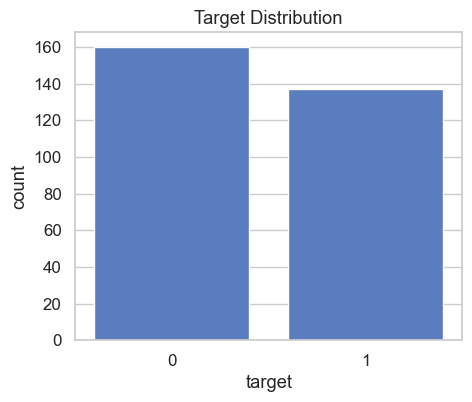

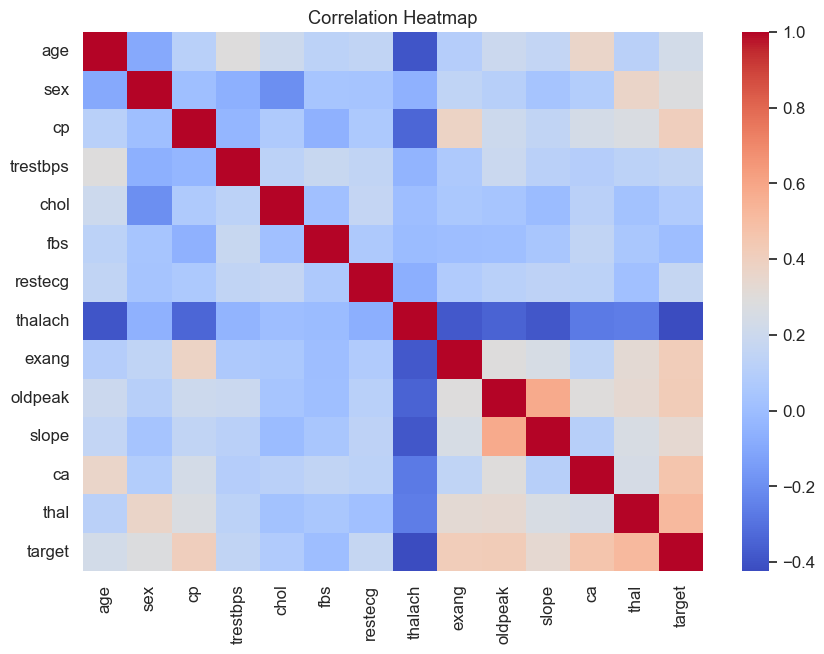


Accuracy: 0.7333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



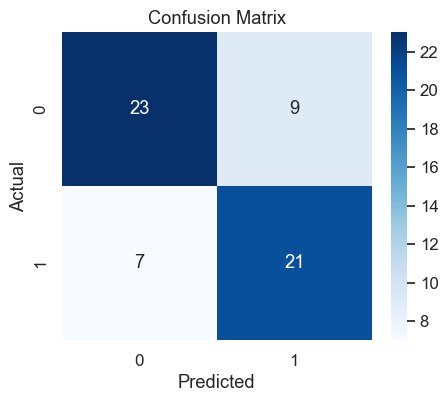

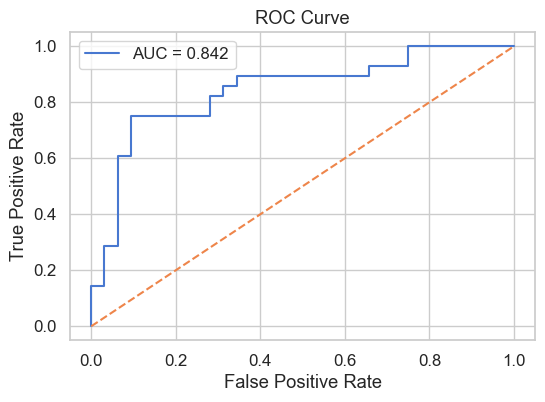

In [18]:
# ---------------------------------------------------------
# 1) Load Dataset
# ---------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("heart_disease.csv")

# Rename label column
df.rename(columns={"condition": "target"}, inplace=True)

print("Dataset shape:", df.shape)
display(df.head())

# ---------------------------------------------------------
# 2) Check for missing values
# ---------------------------------------------------------
print("Missing values:\n")
print(df.isnull().sum())

# ---------------------------------------------------------
# 3) Basic EDA
# ---------------------------------------------------------
print("\nTarget distribution:")
print(df['target'].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x=df['target'])
plt.title("Target Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ---------------------------------------------------------
# 4) Split Data for Model Training
# ---------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("target", axis=1)
y = df["target"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ---------------------------------------------------------
# 5) Train Logistic Regression Model
# ---------------------------------------------------------
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# ---------------------------------------------------------
# 6) Model Evaluation
# ---------------------------------------------------------
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------------------------------------------------
# 7) ROC Curve
# ---------------------------------------------------------
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_value = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_value:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
